In [ ]:
%matplotlib inline

In [2]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import tensorflow as tf  
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import numpy as np

cudnn.benchmark = True
print("GPU: " + str(torch.cuda.is_available()))

GPU: False


In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

# Load the CIFAR100 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(len(x_train))
print(len(x_test))

# Convert pixel values to float data type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

data = []
data.extend(x_train)
data.extend(x_test)
data_min = np.min(data, axis=(1,2), keepdims=True)
data_max = np.max(data, axis=(1,2), keepdims=True)

scaled_data = (data - data_min) / (data_max - data_min)

#push normalized data back to x_train and x_test
x_train = scaled_data[:len(x_train)]
x_test = scaled_data[len(x_train):]

# make labels categorical
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


50000
10000


In [5]:
# make a convolutional neural network
# Define the CNN model

model = Sequential()

# Add the first convolutional layer
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(32,32,3), padding = 'same'))

# Add a second convolutional layer
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding = 'same'))

# Add a max pooling layer
model.add(MaxPooling2D(pool_size=(2,2), padding = 'same'))

# Add a third convolutional layer
model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding = 'same'))

# Add a fourth convolutional layer
model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding = 'same'))

# Add a max pooling layer
model.add(MaxPooling2D(pool_size=(2,2), padding = 'same'))

# Add a fifth convolutional layer
model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding = 'same'))

# Add a sixth convolutional layer
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding = 'same'))

# Add a max pooling layer
model.add(MaxPooling2D(pool_size=(2,2), padding = 'same'))

# Flatten the output layer
model.add(Flatten())

# Add a fully connected layer with 128 hidden units and a ReLU activation function
model.add(Dense(512, activation='relu'))

# Add a dropout layer for regularization
model.add(Dropout(0.8))

# Add a fully connected layer with 128 hidden units and a ReLU activation function
model.add(Dense(500, activation='relu'))

# Add a dropout layer for regularization
model.add(Dropout(0.8))

# Add the output layer with 10 nodes (one for each class) and a softmax activation function
model.add(Dense(num_classes, activation='softmax'))



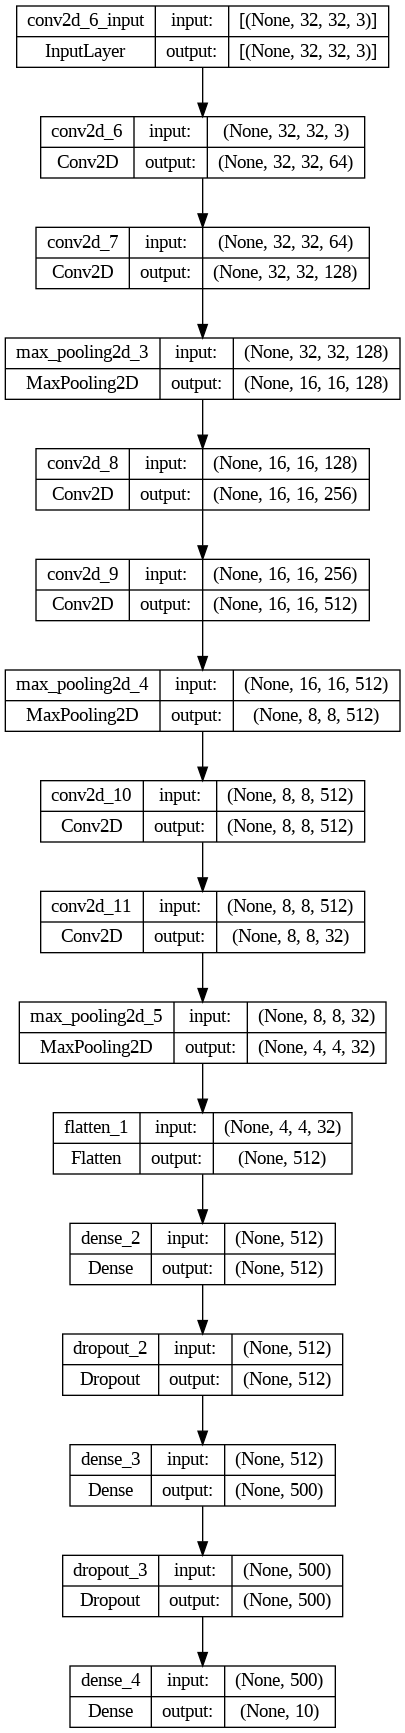

In [6]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
batch_size = 1000
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#go to github and use a simple resnet/alexnet as a benchmark  

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=100,
          verbose=1,
          learning_rate=0.001,
          validation_data=(x_test, y_test),
          callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)])
model.summary()

Epoch 1/100
50/50 [==============================] - 51s 517ms/step - loss: 2.2824 - accuracy: 0.1250 - val_loss: 2.1818 - val_accuracy: 0.1607
Epoch 2/100
50/50 [==============================] - 26s 517ms/step - loss: 2.0910 - accuracy: 0.2091 - val_loss: 1.9369 - val_accuracy: 0.2781
Epoch 3/100
50/50 [==============================] - 25s 498ms/step - loss: 1.7940 - accuracy: 0.3060 - val_loss: 1.5735 - val_accuracy: 0.3727
Epoch 4/100
50/50 [==============================] - 25s 497ms/step - loss: 1.5966 - accuracy: 0.3818 - val_loss: 1.4409 - val_accuracy: 0.4530
Epoch 5/100
50/50 [==============================] - 26s 519ms/step - loss: 1.4568 - accuracy: 0.4473 - val_loss: 1.3972 - val_accuracy: 0.4813
Epoch 6/100
35/50 [====================>.........] - ETA: 7s - loss: 1.3164 - accuracy: 0.5157

In [ ]:
pred_train= model.predict(x_train)
scores = model.evaluate(x_train, y_train, verbose=0)
print('Accuracy on training data: {} \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   
 
pred_test= model.predict(x_test)
scores2 = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy on test data: {} \n Error on test data: {}'.format(scores2[1], 1 - scores2[1])) 

1563/1563 [==============================] - 7s 4ms/step
Accuracy on training data: 0.9589599967002869 
 Error on training data: 0.041040003299713135
313/313 [==============================] - 1s 4ms/step
Accuracy on test data: 0.8007000088691711 
 Error on test data: 0.19929999113082886
